In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import BisectingKMeans
import numpy as np
import re
%matplotlib inline

In [2]:
datesets = pd.read_csv('pain3.csv')
dataset_json = pd.read_json('Target.json')

Сompany = dataset_json['Target'].apply(lambda x: x['Сompany']) 
Nominations = dataset_json['Target'].apply(lambda x: x['Nominations'])

Сompany= pd.DataFrame(np.repeat(Сompany,5))

Сompany = Сompany.rename(columns= {'Target' : 'Сompany'})

Nominations = pd.DataFrame(np.repeat(Nominations,5))

Nominations = Nominations.rename(columns={'Target' : 'Nominations'})

dataset_json = pd.concat([Сompany, Nominations], axis=1)

dataset_json

dataset_json['Target'] = dataset_json['Сompany'] + ['Nominations']

dataset_json

datesets = dataset_json.join(datesets)

In [3]:
datesets

,абсолютно,автоматизация,автоматизированный,автоматизировать,автоматически,автоматический,автор,адрес,активно,активность,...,эффект,эффективно,эффективность,эффективный,являться,явно,ядро,язык,язык программирование,яндекс
0,0.045896,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037486,0.000000,...,0.040040,0.000000,0.000000,0.000000,0.052057,0.000000,0.0,0.072743,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018661,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.020508,0.000000,0.025691,0.0,0.030321,0.024463,0.024463
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022244,0.000000,0.076494,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,0.000000,0.021393,0.022722,0.021811,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.020618,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,0.040523,0.000000,0.000000,0.000000,0.032097,0.000000,0.000000,0.000000,0.033097,0.000000,...,0.000000,0.000000,0.035981,0.000000,0.022982,0.000000,0.0,0.308291,0.041455,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.009536,0.000000,0.000000,0.000000,0.003776,0.000000,0.044647,0.004159,0.007788,0.023839,...,0.012478,0.009138,0.016933,0.016355,0.124380,0.000000,0.0,0.003023,0.000000,0.000000
106,0.011499,0.042372,0.011251,0.010800,0.000000,0.000000,0.008973,0.000000,0.009391,0.011499,...,0.000000,0.000000,0.010210,0.009861,0.052169,0.012353,0.0,0.000000,0.000000,0.011763
107,0.012052,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009843,0.000000,...,0.000000,0.000000,0.010701,0.000000,0.041010,0.000000,0.0,0.000000,0.000000,0.036987
108,0.023504,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019197,0.000000,...,0.020505,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [4]:
datesets

,абсолютно,автоматизация,автоматизированный,автоматизировать,автоматически,автоматический,автор,адрес,активно,активность,...,эффект,эффективно,эффективность,эффективный,являться,явно,ядро,язык,язык программирование,яндекс
0,0.045896,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037486,0.000000,...,0.040040,0.000000,0.000000,0.000000,0.052057,0.000000,0.0,0.072743,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018661,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.020508,0.000000,0.025691,0.0,0.030321,0.024463,0.024463
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022244,0.000000,0.076494,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,0.000000,0.021393,0.022722,0.021811,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.020618,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,0.040523,0.000000,0.000000,0.000000,0.032097,0.000000,0.000000,0.000000,0.033097,0.000000,...,0.000000,0.000000,0.035981,0.000000,0.022982,0.000000,0.0,0.308291,0.041455,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.009536,0.000000,0.000000,0.000000,0.003776,0.000000,0.044647,0.004159,0.007788,0.023839,...,0.012478,0.009138,0.016933,0.016355,0.124380,0.000000,0.0,0.003023,0.000000,0.000000
106,0.011499,0.042372,0.011251,0.010800,0.000000,0.000000,0.008973,0.000000,0.009391,0.011499,...,0.000000,0.000000,0.010210,0.009861,0.052169,0.012353,0.0,0.000000,0.000000,0.011763
107,0.012052,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009843,0.000000,...,0.000000,0.000000,0.010701,0.000000,0.041010,0.000000,0.0,0.000000,0.000000,0.036987
108,0.023504,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019197,0.000000,...,0.020505,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [5]:
from sklearn.linear_model import LogisticRegression

обучения модели первой модели

In [6]:
x = datesets
y = datesets


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0 )

In [7]:
print(X_train.shape, X_test.shape)

(77, 1502) (33, 1502)


In [8]:
from sklearn.linear_model import LinearRegression

Обучающиеся

In [9]:
model = LinearRegression()

In [10]:
model.fit(X_train, y_train)

LinearRegression()

In [25]:
test1 = model.coef_

Тестовая

In [12]:
y_pred = model.predict(X_test)

In [13]:
print(y_pred[:5])

[[ 0.00619351  0.01693422  0.0030957  ...  0.04015502  0.02835811
   0.0130928 ]
 [ 0.00715902  0.01872823 -0.00257459 ...  0.03090653  0.003736
   0.00902315]
 [ 0.00944397  0.01261328 -0.00117721 ...  0.01199419  0.0133212
   0.01596115]
 [ 0.00904062 -0.0043167   0.00040928 ...  0.01284952  0.00249936
  -0.0013526 ]
 [-0.00191991  0.16458555  0.04037962 ...  0.03577629  0.01318774
   0.01422357]]


In [14]:
from sklearn import metrics

In [21]:
metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

 ...]

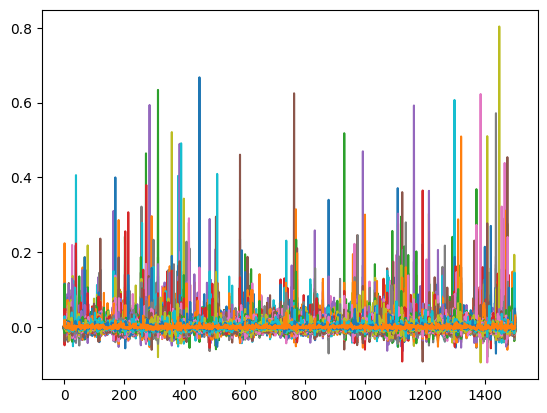

In [50]:
plt.plot(test1)

In [55]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(x, y.astype('int'))

ExtraTreesClassifier(random_state=0)

In [57]:
test2 = clf.

In [54]:
clfa = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train.astype(int))


RandomForestClassifier()